In [34]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.sentiment_analyzer import get_sentiment


In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
from textblob import TextBlob

# Load financial news
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Load stock prices
stock_df = pd.read_csv('../data/yfinance_data/AMZN_historical_data.csv')

In [30]:
print("News DataFrame:")
news_df.head()


News DataFrame:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [31]:
print("\nStock DataFrame:")
stock_df.head()


Stock DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [54]:
# For news
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce').dt.date


# For stock prices
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date


In [56]:
news_df['sentiment'] = news_df['headline'].apply(get_sentiment)


In [40]:
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.tz_localize('UTC').dt.tz_convert('Etc/GMT+4')


In [59]:
merged_df = pd.merge(
    news_df,
    stock_df,
    left_on='date_only',
    right_on='date_only',
    how='inner'
)


print(merged_df.head())

   Unnamed: 0                                           headline  \
0           1         Stocks That Hit 52-Week Highs On Wednesday   
1           2                      71 Biggest Movers From Friday   
2        1835  Shares of several basic material companies are...   
3        1836  Alcoa Seeing Better July Aluminum Shipments Am...   
4        1837  Shares of several basic materials companies ar...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
2  https://www.benzinga.com/wiim/20/06/16213027/s...  Benzinga Newsdesk   
3  https://www.benzinga.com/news/20/06/16203021/a...  Benzinga Newsdesk   
4  https://www.benzinga.com/wiim/20/06/16202370/s...  Benzinga Newsdesk   

         date stock  sentiment   date_only        Date        Open  \
0  2020-06-03     A   0.000000  2020-06-03  2020-06-03  123.871498   


In [60]:
correlation = merged_df[['sentiment', 'Close']].corr()
print("Correlation between sentiment and Close price:")
print(correlation)


Correlation between sentiment and Close price:
           sentiment     Close
sentiment   1.000000 -0.020763
Close      -0.020763  1.000000


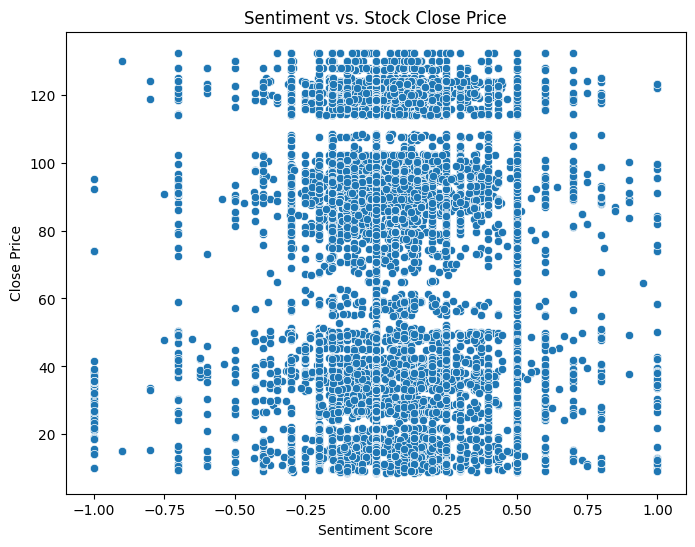

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiment', y='Close', data=merged_df)
plt.title('Sentiment vs. Stock Close Price')
plt.xlabel('Sentiment Score')
plt.ylabel('Close Price')
plt.show()